# <span style ='color:#74B72E'>Stock Market Analysis - Time Series 
## <span style ='color:#FCA510'> <bu>EXPLORATORY NOTEBOOK</bu>

- by Annie Carter
- Sourced by Yahoo Finance

![Image-3.png](https://images.theconversation.com/files/526640/original/file-20230516-23-zv2vps.jpg?ixlib=rb-1.1.0&rect=121%2C80%2C4372%2C2910&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip)

 Custom Palette = Pear#74B72E, Fire #FCA510

In [1]:
# Wrangle
# import wrangle as w
import os

# Transform 
import numpy as np
import pandas as pd

# Visualize 
import matplotlib.pyplot as plt
import seaborn as sns

# Working with dates
from datetime import datetime

# Modeling
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# Evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

## <span style ='color:#74B72E'>ACQUIRE

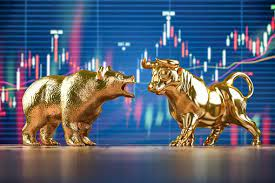

#### Acquired stock market data from Yahoo Finance for Nike, Coca-Cola, Boeing
- Downloaded stock csv. for last 5 years of daily stock market values
- Add Symbol column for each stock dataframe
- concated data frames by Symbol
- 8 columns, 1758 rows 
- Checked for nulls (0) and duplications (0)

In [2]:
# def prep_stocks():
#     ''' 
# The below functions prepares Nike, Coca-Cola, Boeing 
#     '''
# Save and read dataset csv from yahoo.finance.com
df_nke = pd.read_csv('NKE.csv')
# Read 'KO.csv' into another DataFrame
df_ko = pd.read_csv('KO.csv')
    # Read 'BA.csv' into another DataFrame
df_ba = pd.read_csv('BA.csv')   

In [3]:
df_nke.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-06,78.739998,79.580002,78.430000,79.510002,75.650772,4280600
1,2018-08-07,79.730003,80.629997,79.269997,80.529999,76.621254,5418900


In [4]:
df_nke['Symbol'] = 'NKE'

In [34]:
df_nke.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2018-08-06,78.739998,79.580002,78.430000,79.510002,75.650772,4280600,NKE
1,2018-08-07,79.730003,80.629997,79.269997,80.529999,76.621254,5418900,NKE
2,2018-08-08,80.209999,81.080002,80.040001,80.500000,76.592720,5327100,NKE
3,2018-08-09,80.489998,81.879997,80.410004,81.260002,77.315834,4558500,NKE
4,2018-08-10,80.820000,81.290001,80.290001,80.730003,76.811562,5036700,NKE


In [6]:
df_nke.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,112.425588,113.630684,111.180564,112.405811,109.891891,7.009522e+06
std,27.042625,27.198294,26.814730,26.988330,27.105668,3.783877e+06
min,64.790001,66.879997,60.000000,62.799999,60.881496,1.821900e+06
25%,88.007500,88.765001,87.222500,88.010002,84.972815,4.958600e+06
50%,108.279999,109.299999,107.194999,108.239998,107.520001,6.155000e+06
75%,132.577503,133.862495,130.872494,132.217502,129.588707,7.838875e+06
max,176.350006,179.100006,175.500000,177.509995,174.236038,4.817610e+07


In [17]:
df_ko.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2018-08-07,46.520000,46.610001,46.130001,46.500000,39.759106,8632900,KO
1,2018-08-08,46.490002,46.560001,46.119999,46.150002,39.459854,6810000,KO


In [8]:
df_ko['Symbol'] = 'KO'

In [27]:
df_ko.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2018-08-07,46.520000,46.610001,46.130001,46.500000,39.759106,8632900,KO
1,2018-08-08,46.490002,46.560001,46.119999,46.150002,39.459854,6810000,KO
2,2018-08-09,46.250000,46.419998,46.080002,46.349998,39.630863,8924100,KO
3,2018-08-10,46.209999,46.419998,45.970001,46.080002,39.400009,7535400,KO
4,2018-08-13,46.049999,46.130001,45.700001,45.830002,39.186241,8143400,KO


In [10]:
df_ko.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,54.426181,54.829698,53.991838,54.414208,50.704095,1.498058e+07
std,6.025489,6.033664,6.027416,6.046871,7.608781,6.710681e+06
min,38.759998,38.889999,36.270000,37.560001,33.974136,3.265500e+06
25%,49.209999,49.549999,48.759998,49.200001,44.158714,1.081490e+07
50%,54.230000,54.540001,53.900002,54.230000,49.726971,1.355920e+07
75%,60.009998,60.419998,59.590000,60.020000,58.530384,1.724670e+07
max,67.000000,67.199997,65.720001,66.209999,63.820389,6.784570e+07


In [28]:
df_ba.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2018-08-07,348.049988,352.119995,345.500000,350.760010,337.597626,2267400,BA
1,2018-08-08,350.500000,351.619995,346.250000,347.779999,334.729401,2333600,BA
2,2018-08-09,346.070007,346.839996,343.119995,343.720001,332.456390,2301800,BA
3,2018-08-10,341.000000,341.000000,336.450012,339.410004,328.287689,2745700,BA
4,2018-08-13,339.600006,342.149994,337.339996,338.359985,327.272034,1877200,BA


In [12]:
df_ba['Symbol'] = 'BA'

In [13]:
df_ba.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,243.889356,247.397144,240.201352,243.720954,241.544345,1.201582e+07
std,82.801707,83.017794,82.565121,82.927897,79.863090,1.278851e+07
min,98.750000,103.570000,89.000000,95.010002,95.010002,1.390900e+06
25%,180.360001,184.589996,176.259995,179.410004,179.410004,4.709100e+06
50%,214.839996,218.089996,211.869995,214.580002,214.580002,7.697900e+06
75%,334.260010,339.079987,330.670013,334.290009,330.384308,1.284960e+07
max,446.010010,446.010010,440.190002,440.619995,430.299988,1.032128e+08


In [41]:
df_nke=df_nke.drop(df_nke.index[0]) 

In [42]:
df_nke.shape

(1257, 8)

In [43]:
print(f'Nike dataframe shape: {df_nke.shape}')
print (f'Coca-Cola dataframe shape: {df_ko.shape}')
print(f'Boeing dataframe shape: {df_ba.shape}')


Nike dataframe shape: (1257, 8)
Coca-Cola dataframe shape: (1257, 8)
Boeing dataframe shape: (1257, 8)


##  <span style ='color:#74B72E'>PREPARE
- **Data Transformation:** Concat the 3 stock dataframes into 1 dataframe; convert 'Date' to DateTime
- **Handling Missing Values:** 0 nulls

- **Removing Duplicates:** 0 duplictes

- **Data Cleaning:** 0 outliers
- **Feature Selection:** Predicting Future Stock Values 'close'

# TRIAL BY 🔥🔥 LESSONS LEARNED

#### I realized the original data sets did not have same of rows. Be sure to download equal number of days in for CSV. Did head and tail to make sure that they had the same amount of days and both started and finished at the same time. I deleted one row from NKE, it was a day ahead. 

![Image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxvlo2vR0tw3r_g4aTkbwSaOnHPJucvfIwuQ&usqp=CAU)

In [44]:
#this creates a variables containing both dataframes created above
frames = [df_nke, df_ko, df_ba]
 

In [45]:
#this creates a new dataframe using the above variable and combining both dataframes
df_stocks = pd.concat(frames)  
df_stocks.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
141,2019-03-01,446.010010,446.010010,440.190002,440.619995,430.299988,5124200,BA
508,2020-08-13,48.259998,48.730000,48.060001,48.380001,44.158714,9882900,KO
1227,2023-06-23,61.939999,61.970001,61.180000,61.200001,61.200001,25103600,KO
894,2022-02-24,59.970001,60.619999,59.220001,60.509998,57.883026,27207400,KO
1206,2023-05-22,112.849998,112.849998,110.019997,110.180000,109.818512,12710300,NKE


In [46]:
# Review shape to determine processing needs, will use sample size due to network restrictions for exploration
df_stocks.shape

(3771, 8)

In [47]:
#Review data to look at columns datatypes and nulls
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3771 entries, 1 to 1256
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3771 non-null   object 
 1   Open       3771 non-null   float64
 2   High       3771 non-null   float64
 3   Low        3771 non-null   float64
 4   Close      3771 non-null   float64
 5   Adj Close  3771 non-null   float64
 6   Volume     3771 non-null   int64  
 7   Symbol     3771 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 265.1+ KB


In [48]:
# Quick review of data in columns started with 40 then transpose for readiability with head of 5
df_stocks.duplicated().value_counts()

False    3771
dtype: int64

In [49]:
df_stocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [50]:
#Convert 'Date' into datetime dtype
df_stocks.Date = pd.to_datetime(df_stocks.Date)
df_stocks.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Symbol               object
dtype: object

In [51]:
#Make 'Date' column index of Dataframe
df_stocks = df_stocks.set_index('Date').sort_index()


In [52]:
#created sample DF with random state of 42 to review and clean data rapidly
df_stocks.head(2)


,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2018-08-07,79.730003,80.629997,79.269997,80.529999,76.621254,5418900,NKE
2018-08-07,46.520000,46.610001,46.130001,46.500000,39.759106,8632900,KO


### <span style ='color:#FCA510'>PREPARATION FUNCTIONS FOR FINAL NOTEBOOK 

In [53]:
#Min date Aug 6 2018 - Aug 4 2023, 5 year lookback of stocks
df_stocks.index.min(), df_stocks.index.max()

(Timestamp('2018-08-07 00:00:00'), Timestamp('2023-08-04 00:00:00'))

In [54]:
#resample stocks by Month
df_stocks.resample('M').sum()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-31,9012.909989,9066.489993,8938.809987,8998.790026,8578.559304,343248700
2018-09-30,9242.109908,9337.710072,9178.419976,9267.049943,8848.226054,423746900
2018-10-31,11281.579990,11412.780026,11094.140029,11248.589936,10745.118326,625965500
2018-11-30,9819.119973,9949.590085,9663.660017,9822.530035,9395.818892,498072900
2018-12-31,8473.329964,8592.470026,8292.940027,8422.159987,8068.712000,579647200
...,...,...,...,...,...,...
2023-04-30,7517.179974,7587.970004,7448.069964,7525.789984,7508.947272,405487500
2023-05-31,8439.310002,8502.420006,8339.549987,8421.230004,8402.311292,559405700
2023-06-30,8030.670006,8116.609985,7950.810010,8039.680003,8034.768718,665642300


<Axes: xlabel='Date'>

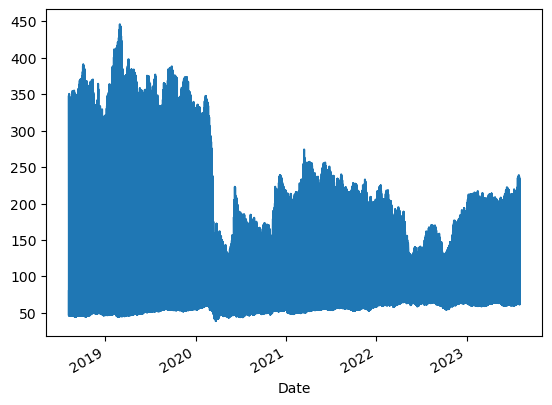

In [55]:
df_stocks.Open.plot()

<Axes: xlabel='Date'>

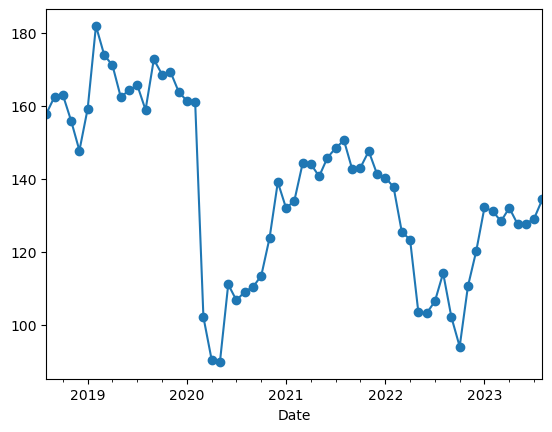

In [56]:
#Plot of stocks by month
df_stocks.Close.resample('M').mean().plot(marker='o')

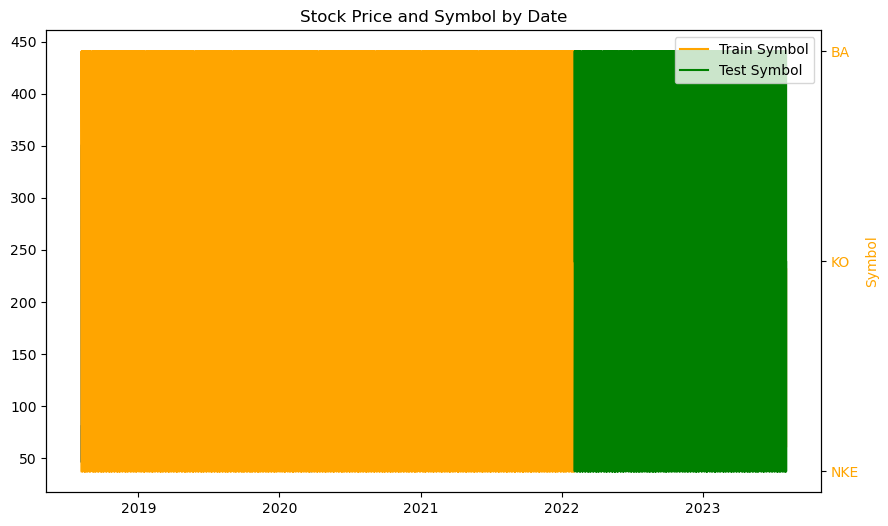

In [61]:
import matplotlib.pyplot as plt

# Assuming 'df_stocks' is your DataFrame containing the data

train_size = 0.70
n = df_stocks.shape[0]
test_start_index = round(train_size * n)
train_targets = ['Close', 'Symbol']

train = df_stocks[train_targets][:test_start_index]  # Select columns and rows for training
test = df_stocks[train_targets][test_start_index:]   # Select columns and rows for testing

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Plotting the 'Close' column for training and testing
plt.plot(train.index, train['Close'], label='Train Close')
plt.plot(test.index, test['Close'], label='Test Close')

# Plotting the 'Symbol' column for training and testing (using a second y-axis)
ax2 = plt.gca().twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(train.index, train['Symbol'], color='orange', label='Train Symbol')
ax2.plot(test.index, test['Symbol'], color='green', label='Test Symbol')
ax2.set_ylabel('Symbol', color='orange')  # Set y-axis label for the 'Symbol' column
ax2.tick_params(axis='y', labelcolor='orange')  # Set y-axis tick color

# Set x-axis label and title
plt.xlabel('Date')
plt.title('Stock Price and Symbol by Date')

# Add legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()  # Show the plot


In [62]:
#target variable "Close" df saved for training
y = train[['Close', 'Symbol']]
y.head()

,Close,Symbol
Date,,
2018-08-07,80.529999,NKE
2018-08-07,46.500000,KO
2018-08-07,350.760010,BA
2018-08-08,80.500000,NKE
2018-08-08,46.150002,KO


In [ ]:
# #THIS CODE DID NOT WORK

# # Calculate rolling averages for 'BA', 'NKE', and 'KO' with window sizes of 3, 5, and 7 days
# rolling_df = df_stocks.resample('W').mean().assign(
#     rolling_3_BA = lambda x: x['Close'][x['Symbol'] == 'BA'].rolling(3).mean(),
#     rolling_3_NKE = lambda x: x['Close'][x['Symbol'] == 'NKE'].rolling(3).mean(),
#     rolling_3_KO = lambda x: x['Close'][x['Symbol'] == 'KO'].rolling(3).mean(),
#     rolling_5_BA = lambda x: x['Close'][x['Symbol'] == 'BA'].rolling(5).mean(),
#     rolling_5_NKE = lambda x: x['Close'][x['Symbol'] == 'NKE'].rolling(5).mean(),
#     rolling_5_KO = lambda x: x['Close'][x['Symbol'] == 'KO'].rolling(5).mean(),
#     rolling_7_BA = lambda x: x['Close'][x['Symbol'] == 'BA'].rolling(7).mean(),
#     rolling_7_NKE = lambda x: x['Close'][x['Symbol'] == 'NKE'].rolling(7).mean(),
#     rolling_7_KO = lambda x: x['Close'][x['Symbol'] == 'KO'].rolling(7).mean()
# )

# # Plotting
# plt.xlabel('Date')
# plt.ylabel('Stock Close Price')

# # Plot the rolling averages
# rolling_df.plot()

# # Add legend and move it to the far right
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# # Add ylabel
# plt.ylabel('Rolling Average')

# plt.show()  # Show the plot


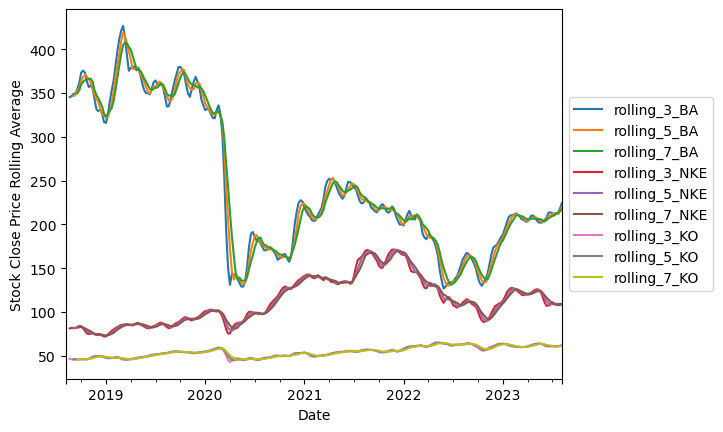

In [63]:
#This is a graph of rolling average grouped by symbol and resampled by W

# Group by 'Symbol' and resample to weekly frequency while calculating the mean
weekly_mean_df = df_stocks.groupby('Symbol').resample('W')['Close'].mean()

# Calculate rolling averages for 'BA', 'NKE', and 'KO' with window sizes of 3, 5, and 7 days
rolling_df = pd.DataFrame()
for symbol in ['BA', 'NKE', 'KO']:
    for window_size in [3, 5, 7]:
        rolling_avg = weekly_mean_df.loc[symbol].rolling(window_size).mean()
        column_name = f'rolling_{window_size}_{symbol}'
        rolling_df[column_name] = rolling_avg

# Plot the rolling averages
rolling_df.plot()
# Add legend and move it to the far right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Add ylabel
plt.ylabel('Stock Close Price Rolling Average')
plt.show()

<Figure size 4500x3000 with 0 Axes>

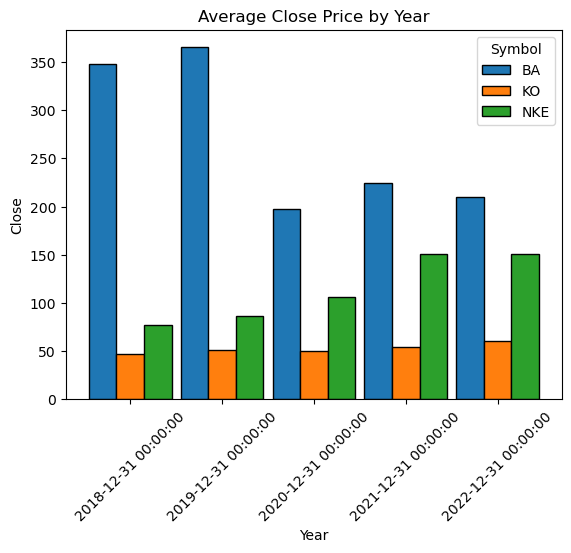

In [70]:
# Resample by year and calculate the mean close price
y_year = y.groupby(['Symbol', pd.Grouper(freq='Y')])['Close'].mean()

plt.figure(figsize=(45, 30)) 

# Plotting the average close price by month for different symbols
ax = y_year.unstack('Symbol').plot(kind='bar', width=0.9, ec='black')

plt.xticks(rotation=45)
ax.set(title='Average Close Price by Year', xlabel='Year', ylabel='Close')

plt.legend(title='Symbol')


plt.show()  # Show the plot



In [72]:
# Resample by week and calculate the mean close price
y_week = y.groupby(['Symbol', pd.Grouper(freq='W')])['Close'].mean()

# Filter for the year 2023
y_week_2023 = y_week.loc[y_week.index.year == 2023]

# Sort the data
y_week_2023_sorted = y_week_2023.sort_values(ascending=False)

# Plot the average close price by weekday for the year 2023
ax = y_week_2023_sorted.groupby(y_week_2023_sorted.index.day_name()).mean().plot.bar(width=0.9, ec='black')

plt.xticks(rotation=90)
ax.set(title='Average Close Price by Weekday (Year 2023)', xlabel='Weekday', ylabel='Close')

plt.show()


AttributeError: 'MultiIndex' object has no attribute 'year'

In [78]:
y_week.index.info()

AttributeError: 'MultiIndex' object has no attribute 'info'

<Figure size 1000x600 with 0 Axes>

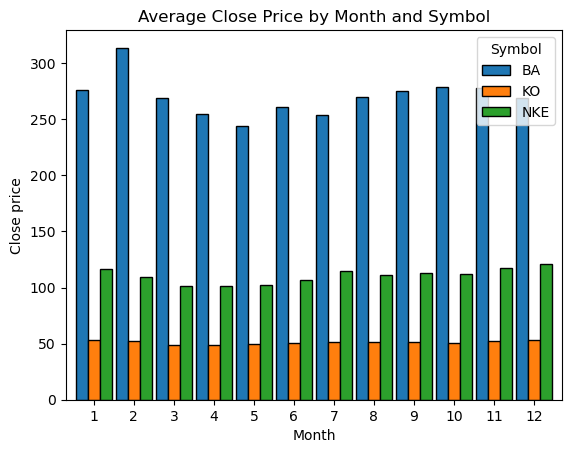

In [79]:
#Average close price by Month and Symbol. Unequal dataframes. 

# Assuming 'y' is your DataFrame containing the data

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Group by month and symbol, calculate the mean, and create a bar plot
ax = y.groupby([y.index.month, 'Symbol']).mean().unstack()['Close'].plot.bar(width=0.9, ec='black')

plt.xticks(rotation=0)
ax.set(title='Average Close Price by Month and Symbol', xlabel='Month', ylabel='Close price')
plt.legend(title='Symbol')  # Add legend with 'Symbol' title

plt.show()  # Show the plot


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


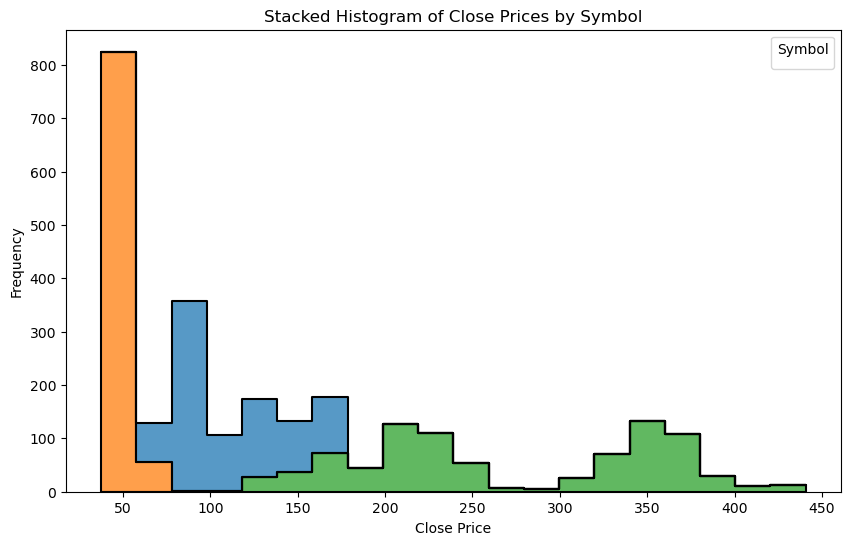

In [80]:
# Assuming 'y' is your DataFrame containing the data

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Create a stacked histogram using Seaborn
ax = sns.histplot(data=y, x='Close', hue='Symbol', multiple='stack', bins=20, element='step', linewidth=1.5)

plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Close Prices by Symbol')

plt.legend(title='Symbol') 

plt.show()  # Show the plot



In [ ]:
# ## CODE FAILED NEED TO ADJUST
# ## need to adjust dataframe rows so that all symbols have same # of rows in dataframe. 


# plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# # Create separate histograms for each symbol using Seaborn
# ax1 = sns.histplot(data=y[y['Symbol'] == 'BA'], x=y.index.month, bins=20, element='step', linewidth=1.5, label='Symbol BA')
# ax2 = sns.histplot(data=y[y['Symbol'] == 'KO'], x=y.index.month, bins=20, element='step', linewidth=1.5, label='Symbol KO')

# plt.xlabel('Month')
# plt.ylabel('Frequency')
# plt.title('Stacked Histogram of Close Prices by Symbol and Month')

# plt.legend(title='Symbol') 

# plt.show()  # Show the plot


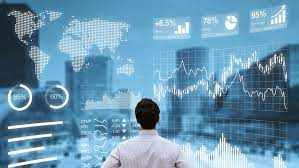

In [ ]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [ ]:
y.data=y[y['Symbol'] == ('BA', 'KO')].plot(alpha=.2, label='Symbol')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [ ]:
df_resampled = df_stocks.resample('M')[['quantity','sales_total']].sum()

# Drop February 29th from our dataset (a leap year date)
df_resampled = df_resampled[df_resampled.index != '%02-29']

##  <span style ='color:#74B72E'>DATA SPLIT

In [ ]:
train_size = int(len(df_stocks) * .5)
validate_size = int(len(df_stocks_resampled) * .3)
test_size = int(len(df_resampled) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = df_resampled[: train_size]
validate = df_resampled[train_size : validate_end_index]
test = df_resampled[validate_end_index : ]

## <span style ='color:#FCA510'>BOEING TIME-SERIES FINDINGS

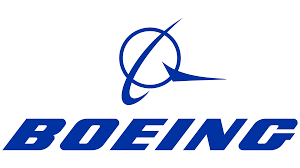

#### DATA VISUALIZATION FINDINGS :


## <span style ='color:#FCA510'>COCA-COLA TIMES-SERIES FINDINGS?

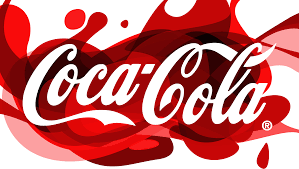

#### DATA VISUALIZATION FINDINGS :

## <span style ='color:#FCA510'>NIKE TIMES-SERIES FINDINGS?

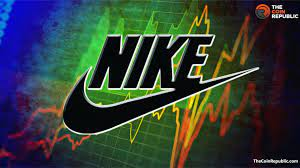

#### DATA VISUALIZATION FINDINGS :

#  <span style ='color:#74B72E'> TIME SERIES MODELING

## <span style ='color:#FCA510'>TRAIN

### <span style ='color:#757C88'> Last Observed Value

### <span style ='color:#757C88'>Simple Average

### <span style ='color:#757C88'>Moving Average

### <span style ='color:#757C88'>Previous Cycle

### <span style ='color:#757C88'>Holt's Linear Trend

### <span style ='color:#757C88'>Holt's Seasonal Trend

## <span style ='color:#FCA510'>VALIDATE
### <span style ='color:#757C88'> Last Observed Value
### <span style ='color:#757C88'>Simple Average
### <span style ='color:#757C88'>Moving Average
### <span style ='color:#757C88'>Previous Cycle
### <span style ='color:#757C88'>Holt's Linear Trend
### <span style ='color:#757C88'>Holt's Seasonal Trend


### TOP MODEL SELECTION: 

## <span style ='color:#FCA510'>TEST

## <span style ='color:#74B72E'> Findings: 
 

## <span style ='color:#241571'> NEXT STEPS



###  <span style ='color:#241571'> START OF NEXT STEPS
#### Time series 